# Premier League 2024-25 Season - Análisis Exploratorio de Datos

**Objetivo:** Realizar un análisis exploratorio completo de los datos de la Premier League

---

##  1. Importación de Librerías

In [1]:
# Librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Configuración
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Configurar tamaño de figuras
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


##  2. Carga de Datos

In [2]:
# Cargar dataset
df = pd.read_csv('/Users/arturoramirez/Desktop/premier li/24_25_PL_season.csv', encoding='utf-8-sig')

# Limpiar nombres de columnas
df.columns = df.columns.str.strip()

print(f"Dataset cargado: {df.shape[0]} filas x {df.shape[1]} columnas")
df.head()

Dataset cargado: 380 filas x 21 columnas


,Date,Time,HomeTeam,AwayTeam,Full Time Home Goals,Full Time Away Goals,Full Time Result,Half -time Result,Referee,Home Shots,...,Home Shots on Target,Away Shots on Target,Home Fouls,Away Fouls,Home Corners,Away Corners,Home Yellow Cards,Away Yellow Cards,Home Red Cards,Away Red Cards
0,16/08/24,20:00,Man United,Fulham,1,0,Home,Draw,R Jones,14,...,5,2,12,10,7,8,2,3,0,0
1,17/08/24,12:30,Ipswich,Liverpool,0,2,Away,Draw,T Robinson,7,...,2,5,9,18,2,10,3,1,0,0
2,17/08/24,15:00,Arsenal,Wolves,2,0,Home,Home,J Gillett,18,...,6,3,17,14,8,2,2,2,0,0
3,17/08/24,15:00,Everton,Brighton,0,3,Away,Away,S Hooper,9,...,1,5,8,8,1,5,1,1,1,0
4,17/08/24,15:00,Newcastle,Southampton,1,0,Home,Home,C Pawson,3,...,1,4,15,16,3,12,2,4,1,0


##  3. Exploración Inicial

In [3]:
# Información general del dataset
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Date                  380 non-null    str  
 1   Time                  380 non-null    str  
 2   HomeTeam              380 non-null    str  
 3   AwayTeam              380 non-null    str  
 4   Full Time Home Goals  380 non-null    int64
 5   Full Time Away Goals  380 non-null    int64
 6   Full Time Result      380 non-null    str  
 7   Half -time Result     380 non-null    str  
 8   Referee               380 non-null    str  
 9   Home Shots            380 non-null    int64
 10  Away Shots            380 non-null    int64
 11  Home Shots on Target  380 non-null    int64
 12  Away Shots on Target  380 non-null    int64
 13  Home Fouls            380 non-null    int64
 14  Away Fouls            380 non-null    int64
 15  Home Corners          380 non-null    int64
 16  Away Corners       

In [4]:
# Estadísticas descriptivas
df.describe()

,Full Time Home Goals,Full Time Away Goals,Home Shots,Away Shots,Home Shots on Target,Away Shots on Target,Home Fouls,Away Fouls,Home Corners,Away Corners,Home Yellow Cards,Away Yellow Cards,Home Red Cards,Away Red Cards
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.513158,1.421053,13.752632,12.165789,4.834211,4.265789,10.789474,11.276316,5.426316,4.871053,1.905263,2.144737,0.068421,0.068421
std,1.277917,1.189922,5.588045,5.409987,2.488260,2.341636,3.639840,3.513257,3.183457,3.031358,1.395989,1.430021,0.263030,0.252800
min,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,10.000000,9.000000,3.000000,3.000000,8.000000,9.000000,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,13.000000,11.500000,5.000000,4.000000,11.000000,11.000000,5.000000,4.000000,2.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,17.000000,15.000000,6.000000,6.000000,13.000000,14.000000,7.000000,7.000000,3.000000,3.000000,0.000000,0.000000
max,7.000000,6.000000,36.000000,37.000000,16.000000,13.000000,21.000000,21.000000,17.000000,18.000000,7.000000,8.000000,2.000000,1.000000


In [5]:
# Verificar valores nulos
null_counts = df.isnull().sum()
print("Valores nulos por columna:")
print(null_counts[null_counts > 0] if null_counts.sum() > 0 else "✅ No hay valores nulos")

Valores nulos por columna:
✅ No hay valores nulos


##  4. Limpieza y Transformación de Datos

In [6]:
# Convertir fecha a datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')

# Crear nuevas columnas
df['TotalGoals'] = df['Full Time Home Goals'] + df['Full Time Away Goals']
df['GoalDifference'] = abs(df['Full Time Home Goals'] - df['Full Time Away Goals'])
df['Month'] = df['Date'].dt.month
df['MonthName'] = df['Date'].dt.strftime('%B')
df['DayOfWeek'] = df['Date'].dt.day_name()

print("✅ Datos transformados")
df[['Date', 'HomeTeam', 'AwayTeam', 'TotalGoals', 'MonthName']].head()

✅ Datos transformados


,Date,HomeTeam,AwayTeam,TotalGoals,MonthName
0,2024-08-16,Man United,Fulham,1,August
1,2024-08-17,Ipswich,Liverpool,2,August
2,2024-08-17,Arsenal,Wolves,2,August
3,2024-08-17,Everton,Brighton,3,August
4,2024-08-17,Newcastle,Southampton,1,August


##  5. Análisis Exploratorio

### 5.1 Distribución de Resultados

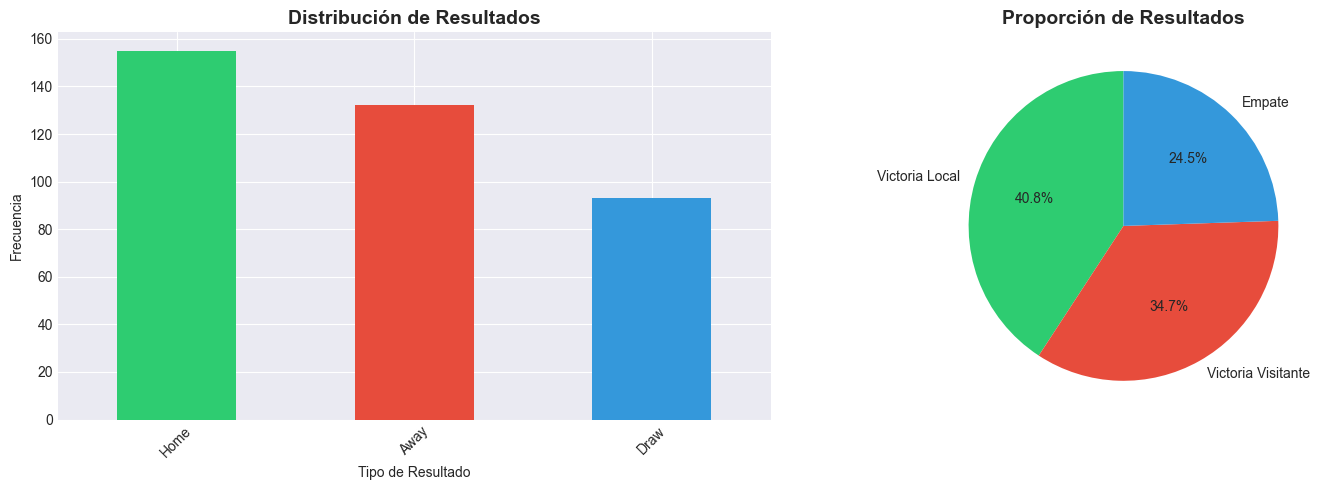


Victorias locales: 155 (40.8%)
Victorias visitantes: 132 (34.7%)
Empates: 93 (24.5%)


In [7]:
# Contar resultados
result_counts = df['Full Time Result'].value_counts()

# Visualizar
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico de barras
result_counts.plot(kind='bar', ax=ax[0], color=['#2ecc71', '#e74c3c', '#3498db'])
ax[0].set_title('Distribución de Resultados', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Tipo de Resultado')
ax[0].set_ylabel('Frecuencia')
ax[0].tick_params(axis='x', rotation=45)

# Gráfico de pastel
ax[1].pie(result_counts.values, labels=['Victoria Local', 'Victoria Visitante', 'Empate'],
          autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c', '#3498db'], startangle=90)
ax[1].set_title('Proporción de Resultados', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nVictorias locales: {result_counts['Home']} ({result_counts['Home']/len(df)*100:.1f}%)")
print(f"Victorias visitantes: {result_counts['Away']} ({result_counts['Away']/len(df)*100:.1f}%)")
print(f"Empates: {result_counts['Draw']} ({result_counts['Draw']/len(df)*100:.1f}%)")

### 5.2 Análisis de Goles

Promedio de goles por partido: 2.93
Mediana de goles por partido: 3
Máximo de goles en un partido: 9
Mínimo de goles en un partido: 0


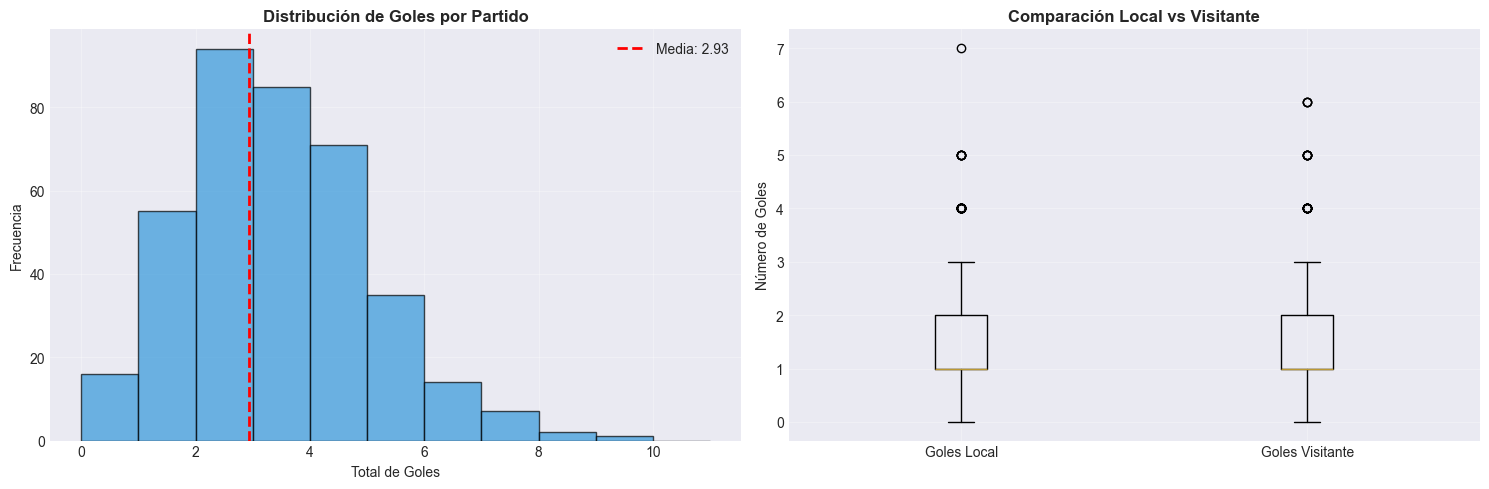

In [8]:
# Estadísticas de goles
print(f"Promedio de goles por partido: {df['TotalGoals'].mean():.2f}")
print(f"Mediana de goles por partido: {df['TotalGoals'].median():.0f}")
print(f"Máximo de goles en un partido: {df['TotalGoals'].max()}")
print(f"Mínimo de goles en un partido: {df['TotalGoals'].min()}")

# Visualizar distribución
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Histograma
ax[0].hist(df['TotalGoals'], bins=range(0, 12), color='#3498db', alpha=0.7, edgecolor='black')
ax[0].axvline(df['TotalGoals'].mean(), color='red', linestyle='--', linewidth=2,
              label=f'Media: {df["TotalGoals"].mean():.2f}')
ax[0].set_xlabel('Total de Goles')
ax[0].set_ylabel('Frecuencia')
ax[0].set_title('Distribución de Goles por Partido', fontweight='bold')
ax[0].legend()
ax[0].grid(alpha=0.3)

# Boxplot
ax[1].boxplot([df['Full Time Home Goals'], df['Full Time Away Goals']],
              labels=['Goles Local', 'Goles Visitante'])
ax[1].set_ylabel('Número de Goles')
ax[1].set_title('Comparación Local vs Visitante', fontweight='bold')
ax[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 5.3 Análisis Temporal

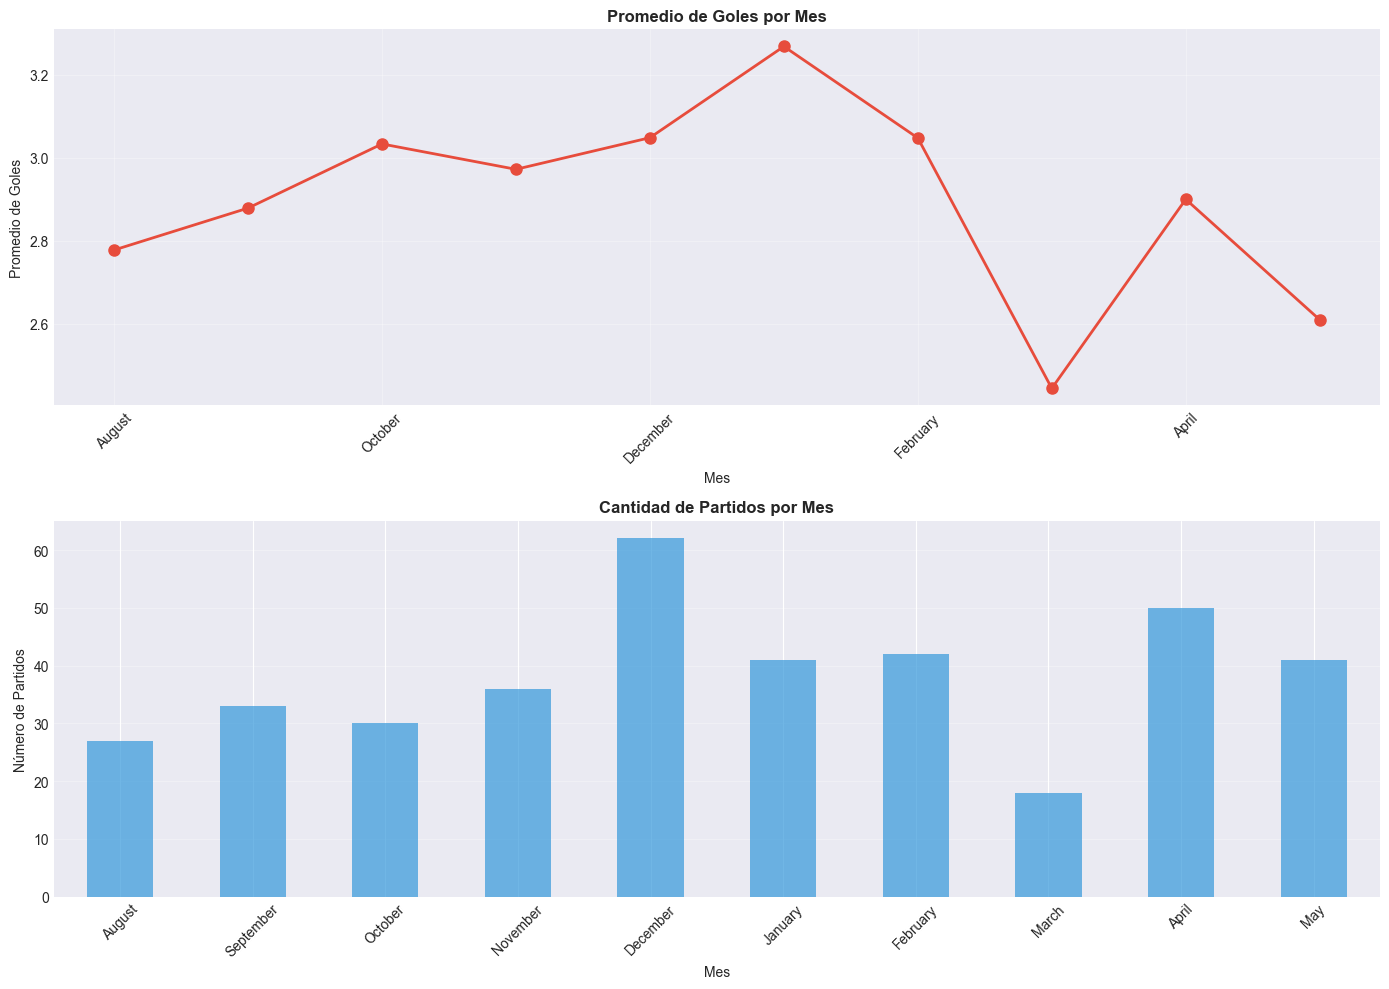


Estadísticas mensuales:
           Promedio  Total  Partidos
MonthName                           
August     2.777778     75        27
September  2.878788     95        33
October    3.033333     91        30
November   2.972222    107        36
December   3.048387    189        62
January    3.268293    134        41
February   3.047619    128        42
March      2.444444     44        18
April      2.900000    145        50
May        2.609756    107        41


In [9]:
# Goles por mes
monthly_goals = df.groupby('MonthName')['TotalGoals'].agg(['mean', 'sum', 'count'])
monthly_goals.columns = ['Promedio', 'Total', 'Partidos']

# Ordenar por mes
month_order = ['August', 'September', 'October', 'November', 'December',
               'January', 'February', 'March', 'April', 'May']
monthly_goals = monthly_goals.reindex([m for m in month_order if m in monthly_goals.index])

# Visualizar
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

# Promedio de goles por mes
monthly_goals['Promedio'].plot(kind='line', marker='o', ax=ax[0],
                               color='#e74c3c', linewidth=2, markersize=8)
ax[0].set_title('Promedio de Goles por Mes', fontweight='bold', fontsize=12)
ax[0].set_xlabel('Mes')
ax[0].set_ylabel('Promedio de Goles')
ax[0].grid(alpha=0.3)
ax[0].tick_params(axis='x', rotation=45)

# Partidos por mes
monthly_goals['Partidos'].plot(kind='bar', ax=ax[1], color='#3498db', alpha=0.7)
ax[1].set_title('Cantidad de Partidos por Mes', fontweight='bold', fontsize=12)
ax[1].set_xlabel('Mes')
ax[1].set_ylabel('Número de Partidos')
ax[1].tick_params(axis='x', rotation=45)
ax[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nEstadísticas mensuales:")
print(monthly_goals)

### 5.4 Análisis de Tarjetas

Total tarjetas amarillas: 1539
Total tarjetas rojas: 52
Promedio tarjetas amarillas por partido: 4.05
Promedio tarjetas rojas por partido: 0.14


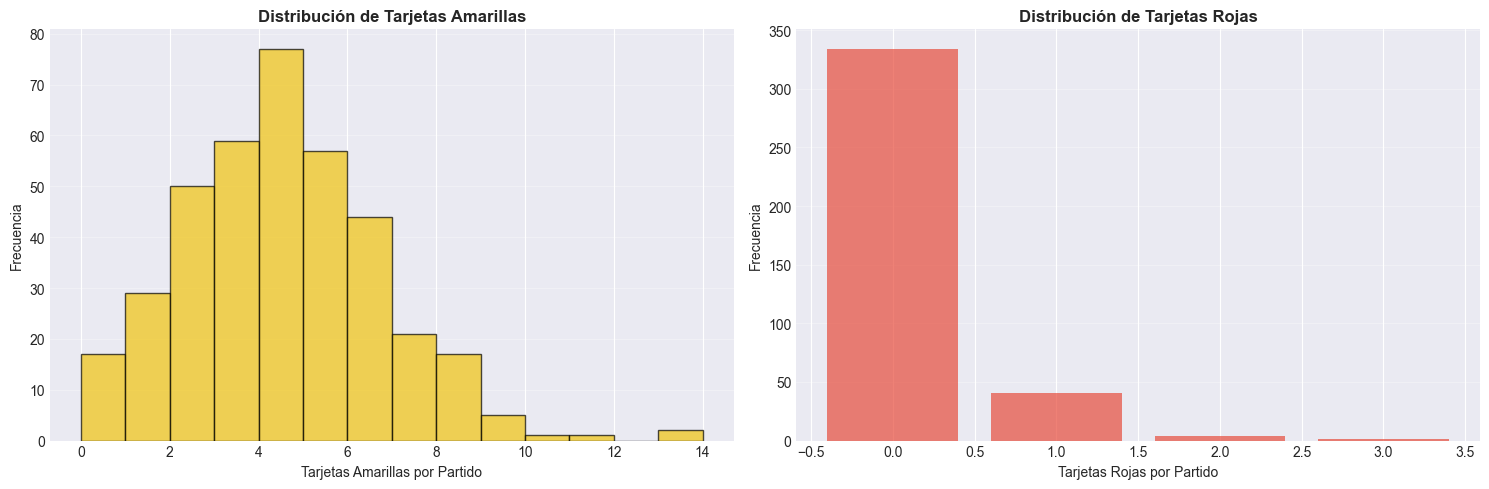

In [10]:
# Total de tarjetas
df['TotalYellowCards'] = df['Home Yellow Cards'] + df['Away Yellow Cards']
df['TotalRedCards'] = df['Home Red Cards'] + df['Away Red Cards']

print(f"Total tarjetas amarillas: {df['TotalYellowCards'].sum()}")
print(f"Total tarjetas rojas: {df['TotalRedCards'].sum()}")
print(f"Promedio tarjetas amarillas por partido: {df['TotalYellowCards'].mean():.2f}")
print(f"Promedio tarjetas rojas por partido: {df['TotalRedCards'].mean():.2f}")

# Visualizar
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Distribución de tarjetas amarillas
ax[0].hist(df['TotalYellowCards'], bins=range(0, 15), color='#f1c40f',
          alpha=0.7, edgecolor='black')
ax[0].set_xlabel('Tarjetas Amarillas por Partido')
ax[0].set_ylabel('Frecuencia')
ax[0].set_title('Distribución de Tarjetas Amarillas', fontweight='bold')
ax[0].grid(alpha=0.3, axis='y')

# Distribución de tarjetas rojas
red_card_counts = df['TotalRedCards'].value_counts().sort_index()
ax[1].bar(red_card_counts.index, red_card_counts.values, color='#e74c3c', alpha=0.7)
ax[1].set_xlabel('Tarjetas Rojas por Partido')
ax[1].set_ylabel('Frecuencia')
ax[1].set_title('Distribución de Tarjetas Rojas', fontweight='bold')
ax[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### 5.5 Top Equipos

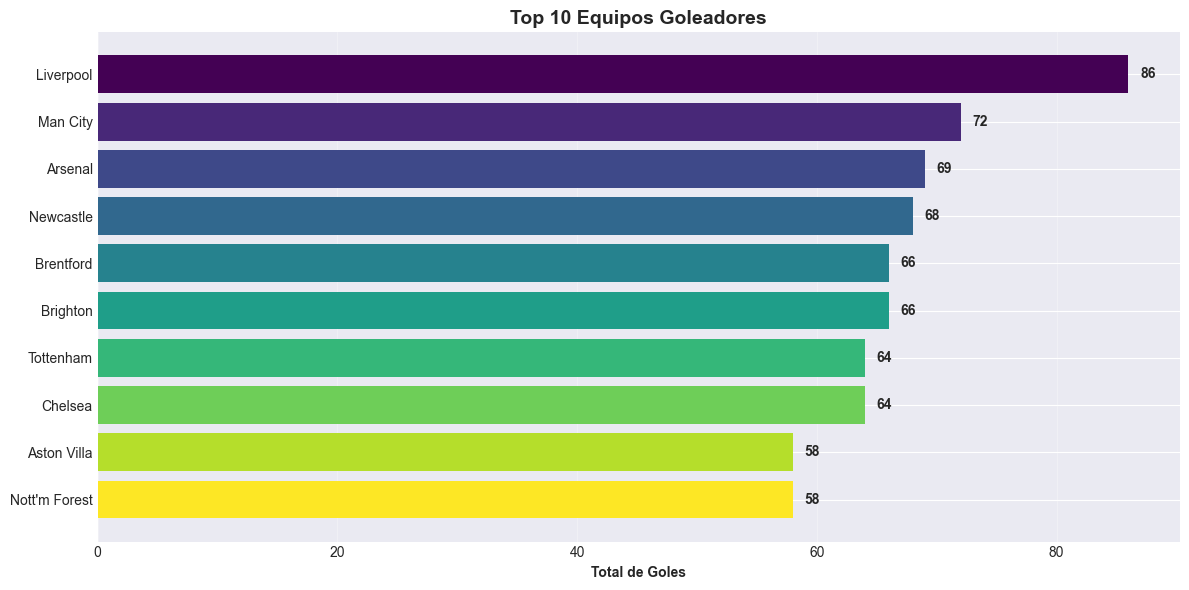


Top 10 equipos goleadores:
         Team  Total_Goals  Games  Goals_Per_Game
    Liverpool           86     38        2.263158
     Man City           72     38        1.894737
      Arsenal           69     38        1.815789
    Newcastle           68     38        1.789474
    Brentford           66     38        1.736842
     Brighton           66     38        1.736842
    Tottenham           64     38        1.684211
      Chelsea           64     38        1.684211
  Aston Villa           58     38        1.526316
Nott'm Forest           58     38        1.526316


In [11]:
# Calcular estadísticas por equipo (simplificado)
teams = set(df['HomeTeam'].unique()) | set(df['AwayTeam'].unique())
team_goals = []

for team in teams:
    home_goals = df[df['HomeTeam'] == team]['Full Time Home Goals'].sum()
    away_goals = df[df['AwayTeam'] == team]['Full Time Away Goals'].sum()
    total_games = len(df[df['HomeTeam'] == team]) + len(df[df['AwayTeam'] == team])
    
    team_goals.append({
        'Team': team,
        'Total_Goals': home_goals + away_goals,
        'Games': total_games,
        'Goals_Per_Game': (home_goals + away_goals) / total_games if total_games > 0 else 0
    })

team_goals_df = pd.DataFrame(team_goals).sort_values('Total_Goals', ascending=False)

# Visualizar top 10
plt.figure(figsize=(12, 6))
top_10 = team_goals_df.head(10)
colors = plt.cm.viridis(np.linspace(0, 1, 10))
plt.barh(range(len(top_10)), top_10['Total_Goals'], color=colors)
plt.yticks(range(len(top_10)), top_10['Team'])
plt.xlabel('Total de Goles', fontweight='bold')
plt.title('Top 10 Equipos Goleadores', fontweight='bold', fontsize=14)
plt.gca().invert_yaxis()

# Agregar valores
for i, (idx, row) in enumerate(top_10.iterrows()):
    plt.text(row['Total_Goals'] + 1, i, f"{int(row['Total_Goals'])}",
            va='center', fontweight='bold')

plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\nTop 10 equipos goleadores:")
print(team_goals_df.head(10).to_string(index=False))

##  6. Correlaciones

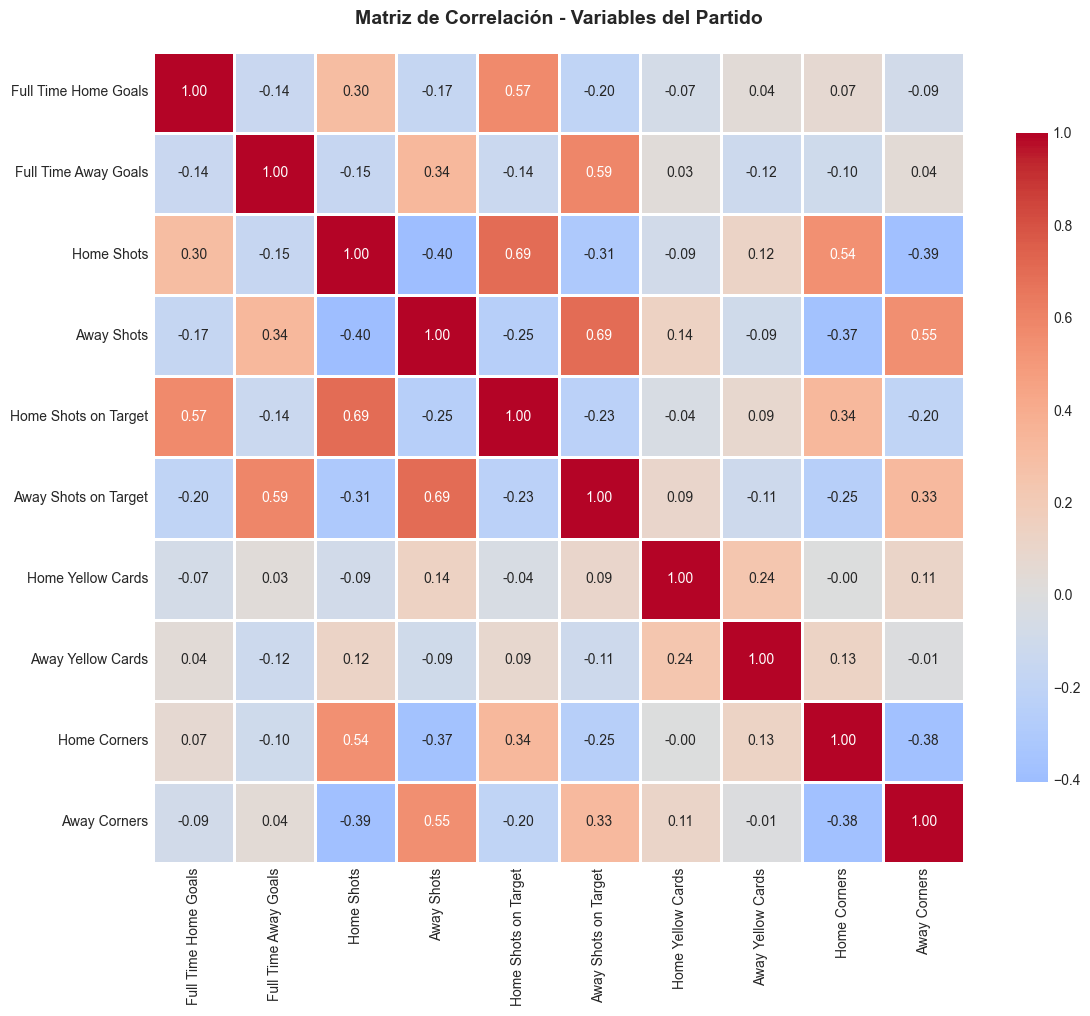


Correlaciones más fuertes con goles:
                      Full Time Home Goals  Full Time Away Goals
Full Time Home Goals              1.000000              0.142466
Home Shots on Target              0.567012              0.141222
Home Shots                        0.300480              0.152939
Away Shots on Target              0.197358              0.587552
Away Shots                        0.167287              0.335058
Full Time Away Goals              0.142466              1.000000
Away Corners                      0.091171              0.041425
Home Corners                      0.071906              0.098358
Home Yellow Cards                 0.070293              0.025665
Away Yellow Cards                 0.035773              0.121192


In [12]:
# Seleccionar variables numéricas
numeric_cols = ['Full Time Home Goals', 'Full Time Away Goals',
                'Home Shots', 'Away Shots', 'Home Shots on Target', 'Away Shots on Target',
                'Home Yellow Cards', 'Away Yellow Cards', 'Home Corners', 'Away Corners']

# Calcular matriz de correlación
corr_matrix = df[numeric_cols].corr()

# Visualizar
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación - Variables del Partido', fontweight='bold', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

print("\nCorrelaciones más fuertes con goles:")
goal_corr = corr_matrix[['Full Time Home Goals', 'Full Time Away Goals']].abs().sort_values(
    by='Full Time Home Goals', ascending=False)
print(goal_corr.head(10))

##  7. Insights Principales

### Conclusiones del Análisis:

1. **Ventaja Local**: Los equipos locales tienen aproximadamente un 40% de victorias
2. **Goles por Partido**: El promedio es de ~3 goles por partido
3. **Disciplina**: Las tarjetas amarillas son mucho más comunes que las rojas
4. **Temporalidad**: Los patrones de goles varían a lo largo de la temporada
5. **Efectividad**: Existe correlación entre tiros a puerta y goles marcados

---